10424108.481481481
key
1     16113.750000
2    252792.105263
Name: 시가, dtype: float64
      순위       종목명  검색비율        현재가      전일비    등락률         거래량         시가  \
1    1.0      삼성전자  1.97    72900.0   1000.0  -1.35  39649489.0    72700.0   
2    2.0      한국전력  0.93    23800.0   1400.0   6.25  22667476.0    22350.0   
3    3.0      셀트리온  0.90   360000.0   6500.0   1.84   2036836.0   344500.0   
4    4.0      KT&G  0.80    86100.0   1500.0   1.77   1149131.0    84800.0   
9    6.0       카카오  0.60   370500.0   4500.0  -1.20    814379.0   371000.0   
10   7.0  셀트리온헬스케어  0.57   156900.0   6900.0   4.60   6639673.0   146000.0   
11   8.0    SK하이닉스  0.57   116500.0   4000.0  -3.32   8160101.0   117000.0   
12   9.0      대웅제약  0.52   139000.0  22000.0  18.80   4780612.0   127000.0   
13  10.0   두산인프라코어  0.52     8670.0    520.0   6.38  20063120.0     8100.0   
17  11.0      신풍제약  0.52   190500.0    500.0  -0.26   3028514.0   191500.0   
18  12.0     SK텔레콤  0.49   238000.0   2000.0  -0.83    3

<ipython-input-137-b758c4849dfd>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_df_clean["검색비율"] = temp
<ipython-input-137-b758c4849dfd>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_df_clean["등락률"] = temp
<ipython-input-137-b758c4849dfd>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

Text(0, 0.5, '시가')

C:\Users\ljs25\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ljs25\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


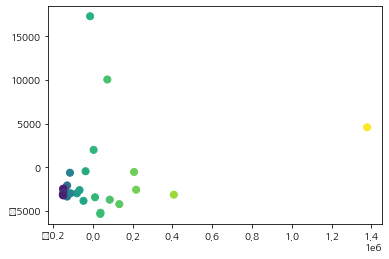

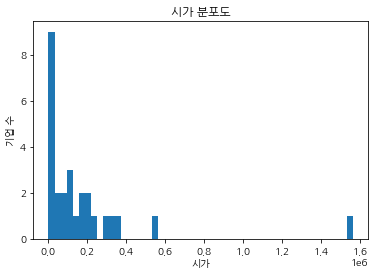

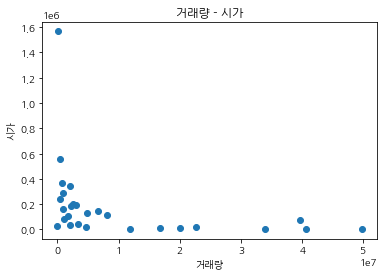

In [137]:
import pandas as pd
import matplotlib 
import numpy as np
matplotlib.font_manager._rebuild()
plt.rcParams['font.family'] = 'NanumGothic'
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
import re

url = 'https://finance.naver.com/sise/lastsearch2.nhn'
req = requests.get(url)
html = req.text
soup = BeautifulSoup(html, 'html.parser')
tables = soup.select('table')
table_name = soup.select('table > caption')  
table_html = str(tables)
table_df_list = pd.read_html(table_html)

table_df = table_df_list[1]
table_df_clean = table_df.dropna() ## 비어있는 행 지우기 ##



## %없애기 ##
temp=[]
for i in table_df_clean["검색비율"]:
    j = i.replace('%', '')
    j = float(j)
    temp.append(j)
table_df_clean["검색비율"] = temp

temp=[]
for i in table_df_clean["등락률"]:
    j = i.replace('%', '')
    j = float(j)
    temp.append(j)
table_df_clean["등락률"] = temp


##거래량 평균구해서 더 많으면 1, 적으면 2로 키값을 만들어 그룹을 묶은다음 거래량 별 시가의 평균을 냄 ##
table_df_clean['key'] = 2
print(table_df_clean['거래량'].mean())
mean = table_df_clean['거래량'].mean()
table_df_clean.loc[table_df_clean['거래량'] >= mean,'key'] = 1

print(table_df_clean.groupby('key')['시가'].mean())

print(table_df_clean)

##머신러닝 부분##

from sklearn.decomposition import PCA
from matplotlib import pyplot as plt


pca = PCA(n_components=2)
pca.fit(table_df_clean.iloc[:10,[2,3,4,5,10,11,12]])


print(pca.explained_variance_ratio_)
print(pca.singular_values_)

pca_df = pca.transform(table_df_clean.iloc[:,[2,3,4,5,10,11,12]])

print(pca_df.shape)

plt.scatter(pca_df[:,0], pca_df[:,1], c=np.log(table_df_clean['현재가'] +1),s=50)

## 그래프 ##

fig = plt.figure()
axes1 = fig.add_subplot(1,1,1)
axes1.hist(table_df_clean['시가'], bins=50)
axes1.set_title('시가 분포도')
axes1.set_xlabel('시가')
axes1.set_ylabel('기업 수')


scatter_plot = plt.figure()
axes2 = scatter_plot.add_subplot(1,1,1)
axes2.scatter(table_df_clean['거래량'],table_df_clean['시가'] )
axes2.set_title('거래량 - 시가')
axes2.set_xlabel('거래량')
axes2.set_ylabel('시가')


